In [1]:
                                                           # LGBM & XGBM

In [2]:
# Exploratory Data Analysis (EDA):

In [3]:
# 1. Load the Titanic dataset using Python's pandas library.

In [4]:
import pandas as pd
df_train = pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.shape

(891, 12)

In [6]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# 2. Check for missing values.

In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
# 3. Explore data distributions using histograms and box plots.

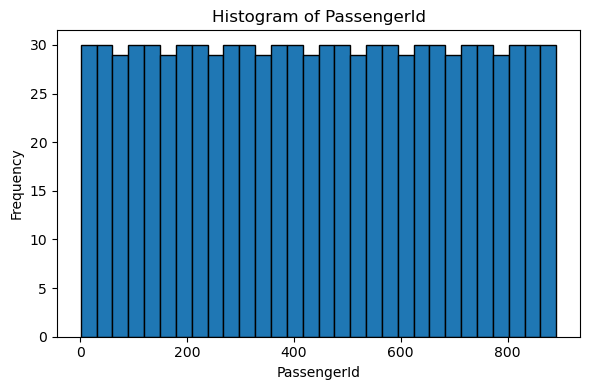

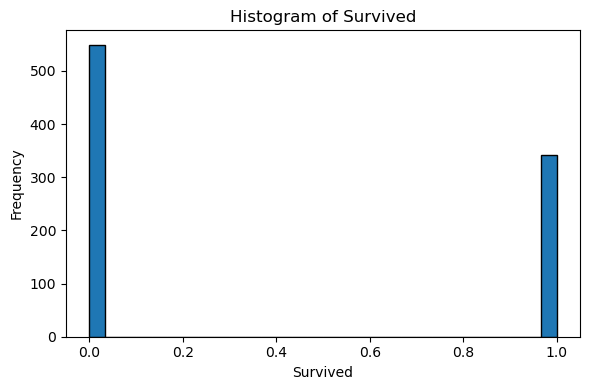

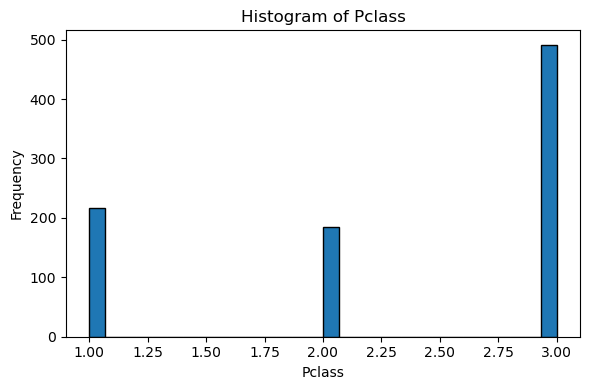

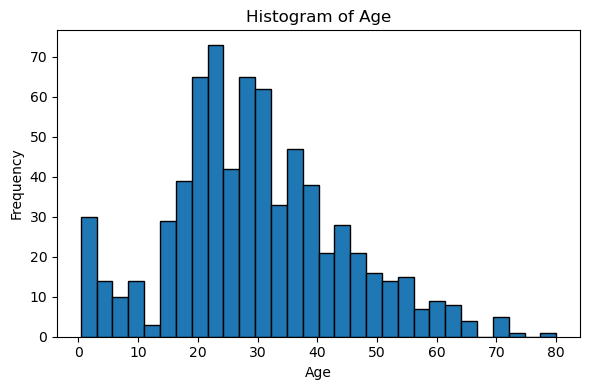

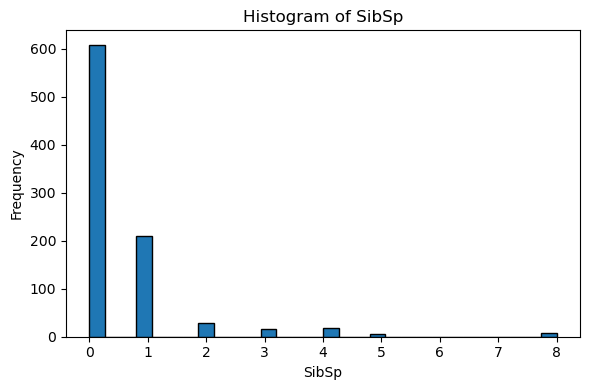

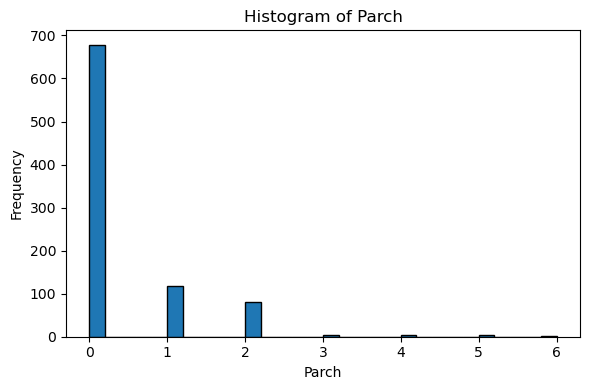

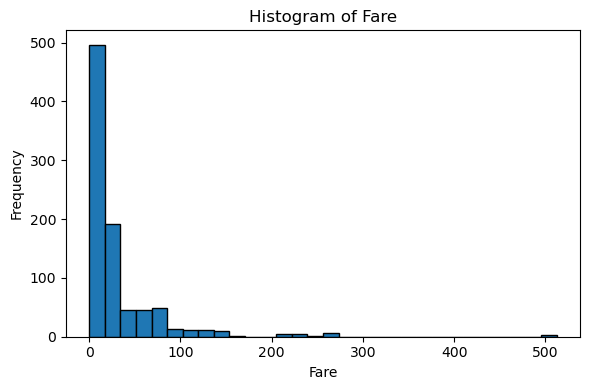

In [11]:
import matplotlib.pyplot as plt
    
for col in df_train.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df_train[col].dropna(), bins=30, edgecolor='black')  
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

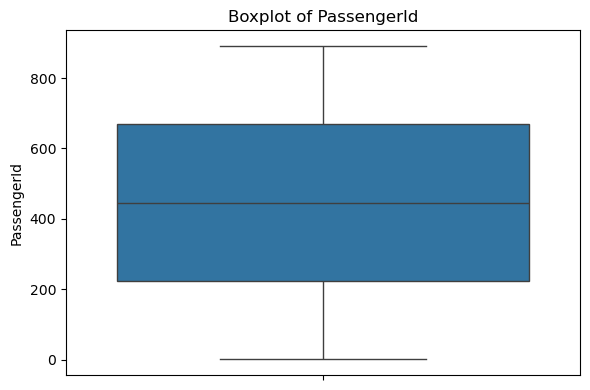

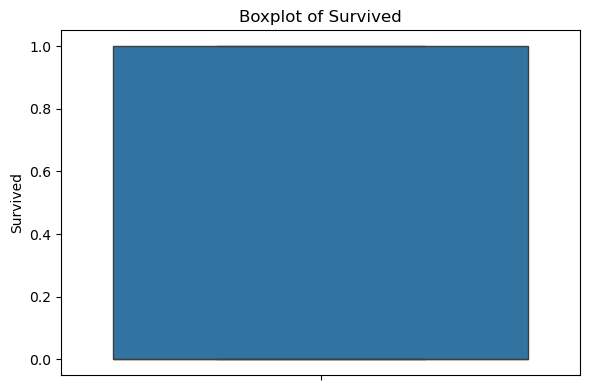

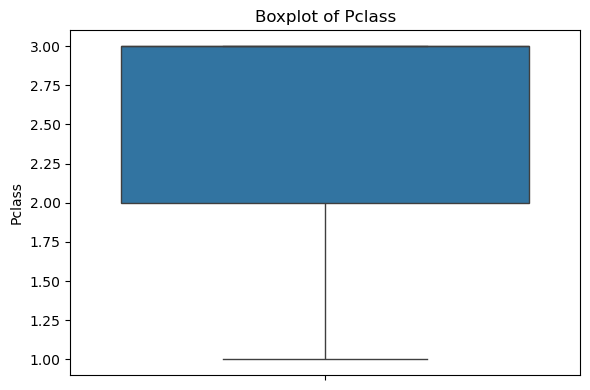

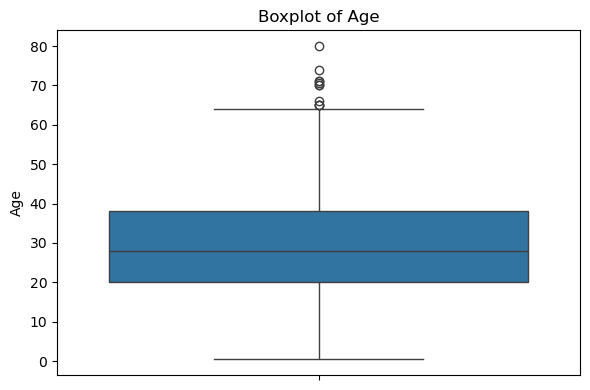

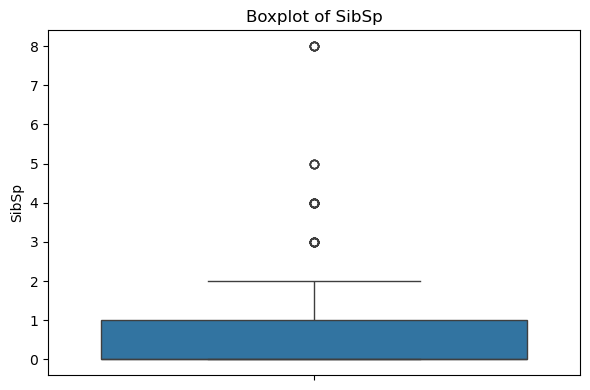

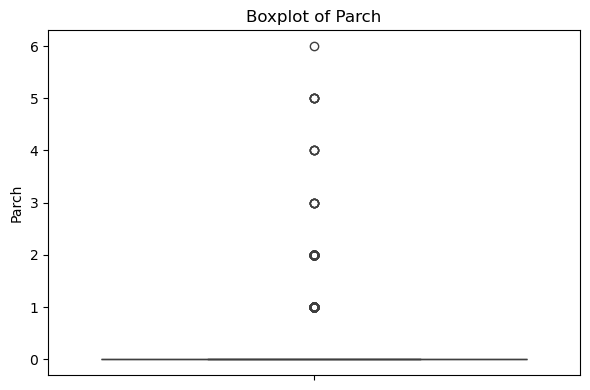

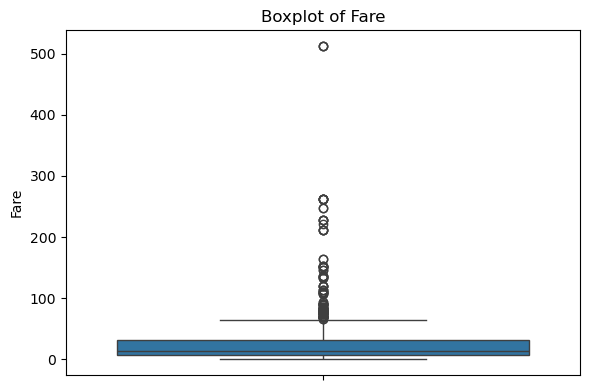

In [12]:
import seaborn as sns
for col in df_train.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_train[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

In [13]:
# 4. Visualize relationships between features and survival using scatter plots and bar plots.

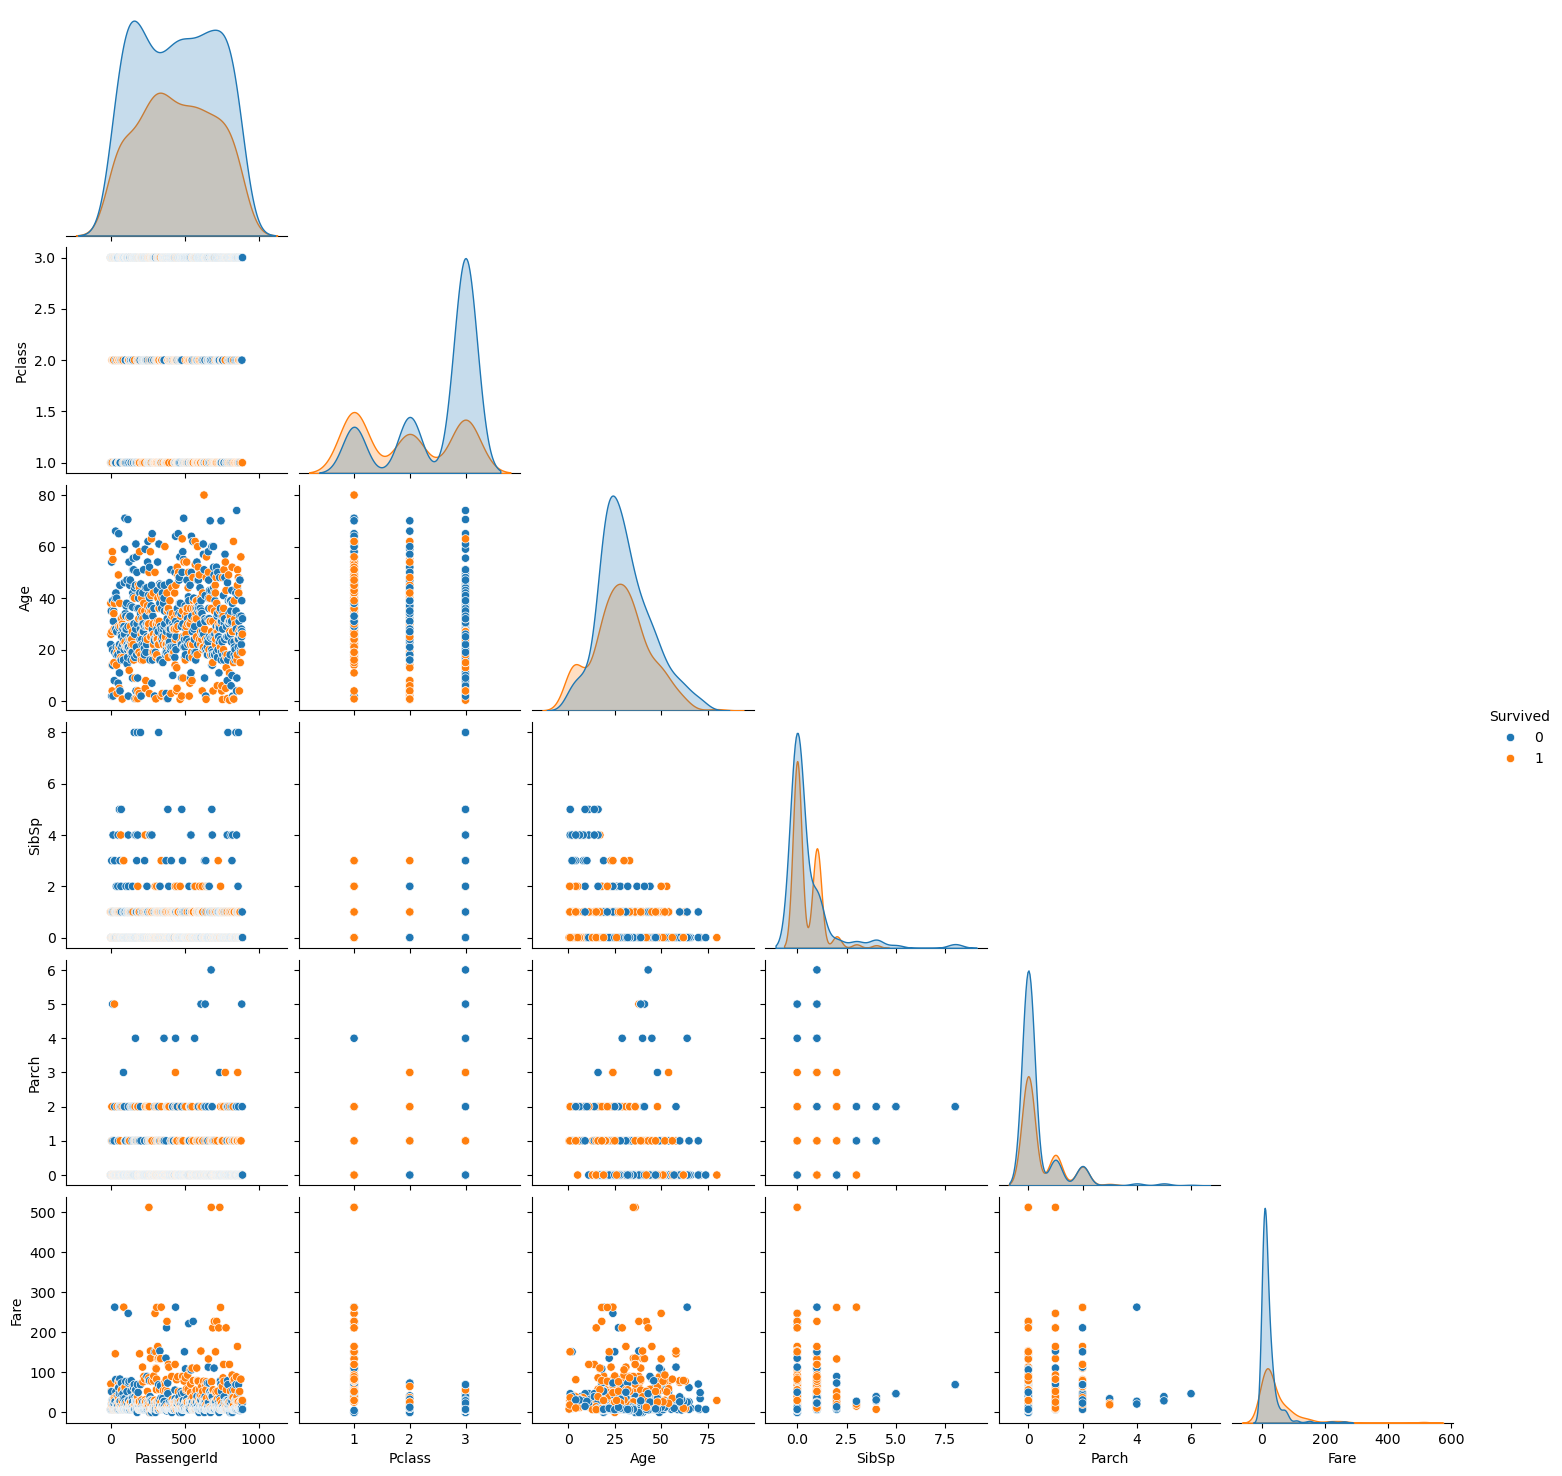

In [14]:
# List of numeric features
num_col = df_train.select_dtypes(include='number').columns.drop('Survived')

# Pairplot (if not too many features)
sns.pairplot(df_train, vars=num_col, hue='Survived', corner=True)
plt.show()


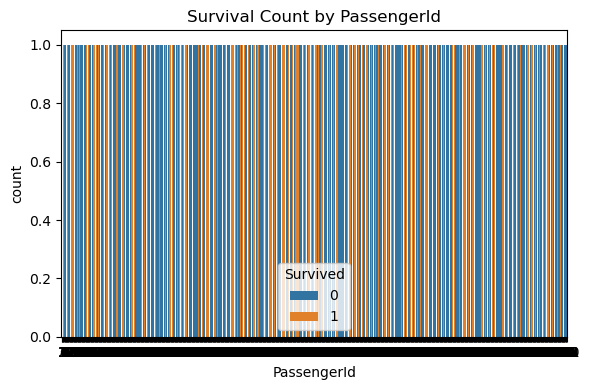

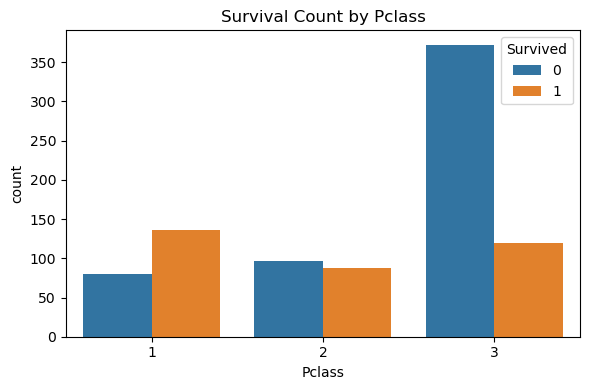

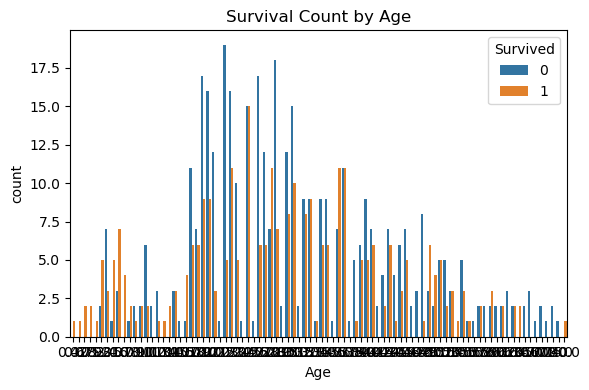

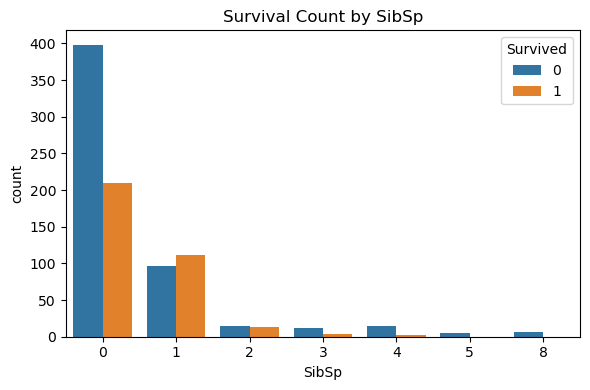

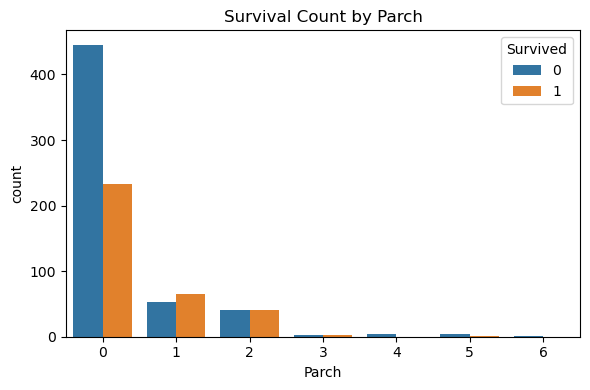

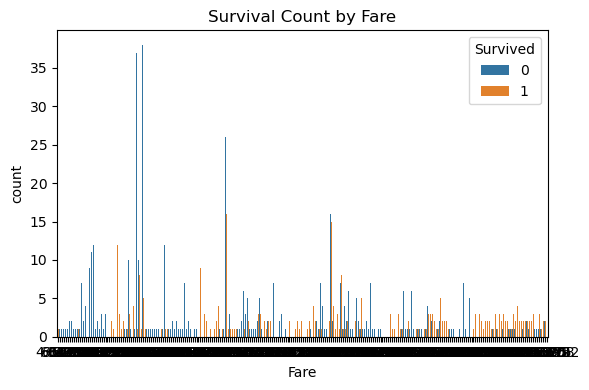

In [15]:
for col in num_col:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_train, x=col, hue='Survived')
    plt.title(f"Survival Count by {col}")
    plt.tight_layout()
    plt.show()

In [16]:
# Data Preprocessing:

In [17]:
# 1. Impute missing values.

In [18]:
df_train = df_train.fillna(df_train['Age'].mean())

In [19]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [20]:
df_test = df_test.fillna(df_test['Age'].mean())

In [21]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [22]:
# 2. Encode categorical variables using one-hot encoding or label encoding. 

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()
df_train['sex'] = le.fit_transform(df_train['Sex'])

In [25]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,29.699118,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,29.699118,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,29.699118,S,1


In [26]:
df_test['sex'] = le.fit_transform(df_test['Sex'])

In [27]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,30.27259,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,30.27259,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,30.27259,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,30.27259,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,30.27259,S,0


In [28]:
df_trained = df_train.drop('Sex',axis='columns')
df_trained.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,29.699118,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,29.699118,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,29.699118,S,1


In [29]:
df_tested = df_test.drop('Sex',axis='columns')
df_tested.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,30.27259,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,30.27259,S,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,30.27259,Q,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,30.27259,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,30.27259,S,0


In [30]:
# Building Predictive Models:

In [31]:
# 1. Split the preprocessed dataset into training and testing sets.

In [32]:
# First i'm going to drop some columns which is not importent to make model in both train and test dataset

In [33]:
x = df_trained.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Survived'],axis='columns')
x.head()

,Pclass,Age,Fare,sex
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [34]:
y = df_trained['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [35]:
df_tested = df_tested.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
df_tested.head()

,Pclass,Age,Fare,sex
0,3,34.5,7.8292,1
1,3,47.0,7.0000,0
2,2,62.0,9.6875,1
3,3,27.0,8.6625,1
4,3,22.0,12.2875,0


In [55]:
features = ['Age', 'Fare', 'Pclass', 'sex']

X_train = df_trained[features]
X_test = df_tested[features]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [56]:
# 2. Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

In [57]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [58]:
# 3. Build predictive models using LightGBM and XGBoost algorithms.

In [60]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 4
[LightGBM] [Info] Start training from score 0.400281
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMRegressor()

In [61]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [42]:
# 4. Train the models on the training set and evaluate their performance on the testing set.

In [62]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("Columns in X_train:", x_train.columns.tolist())
print("Columns in X_test:", x_test.columns.tolist())


X_train shape: (891, 4)
X_test shape: (418, 4)
Columns in X_train: ['Age', 'Fare', 'Pclass', 'sex']
Columns in X_test: ['Age', 'Fare', 'Pclass', 'sex']


In [64]:
y_pred_lgb = lgb_model.predict(X_test)

In [65]:
y_pred_xgb = xgb_model.predict(X_test)

In [81]:
# Model Evaluation for LGB

y_pred_lgb_class = [1 if p >= 0.5 else 0 for p in y_pred_lgb]

print("acc:",accuracy_score(y_test, y_pred_lgb_class))
print("precision:",precision_score(y_test, y_pred_lgb_class))
print("F1:",f1_score(y_test,y_pred_lgb_class))
print("Recall:",recall_score(y_test,y_pred_lgb_class))

acc: 0.8715083798882681
precision: 0.8035714285714286
F1: 0.7964601769911505
Recall: 0.7894736842105263


In [71]:
# Model Evaluation for XGB

y_pred_xgb_class = [1 if p >= 0.5 else 0 for p in y_pred_xgb]

print("acc:",accuracy_score(y_test, y_pred_xgb_class))
print("precision:",precision_score(y_test, y_pred_xgb_class))
print("F1:",f1_score(y_test,y_pred_xgb_class))
print("Recall:",recall_score(y_test,y_pred_xgb_class))

acc: 0.88268156424581
precision: 0.7903225806451613
F1: 0.8235294117647058
Recall: 0.8596491228070176


In [73]:
# 5. Use techniques like cross-validation and hyperparameter tuning to optimize model performance

In [74]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [15, 31, 63]
}

In [84]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

# Optimize LGB model performence

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=lgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=kfold,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 4
[LightGBM] [Info] Start training from score 0.400281
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


D:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'num_leaves': [15, 31, 63]},
             scoring='accuracy', verbose=1)

In [80]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'num_leaves': 15}


In [83]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Test Accuracy:", accuracy_score(y_test, y_pred_lgb_class))
print(classification_report(y_test, y_pred_lgb_class))

Test Accuracy: 0.8715083798882681
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       122
           1       0.80      0.79      0.80        57

    accuracy                           0.87       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.87      0.87      0.87       179



In [85]:
# Optimize XGB model performence

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=kfold,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


D:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\Kishan Senjaliya\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [18:46:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "num_leaves" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'num_leaves': [15, 31, 63]},
             scoring='accuracy', verbose=1)

In [86]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'num_leaves': 15}


In [87]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Test Accuracy:", accuracy_score(y_test, y_pred_xgb_class))
print(classification_report(y_test, y_pred_xgb_class))

Test Accuracy: 0.88268156424581
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       122
           1       0.79      0.86      0.82        57

    accuracy                           0.88       179
   macro avg       0.86      0.88      0.87       179
weighted avg       0.89      0.88      0.88       179



In [88]:
# Comparative Analysis:

In [89]:
# 1. Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

In [91]:
# 1. Accuracy
# Definition: Proportion of correctly predicted instances (both positive and negative).

# LightGBM:
# Often performs slightly faster due to histogram-based splitting.
# Accuracy is usually high, but sensitive to hyperparameters.

# XGBoost:
# More stable and robust out-of-the-box.
# Accuracy is comparable or sometimes better if well-tuned.

# Winner: Tie — depends on dataset and tuning, but LightGBM may be slightly faster.

In [92]:
# 2. Precision
# Definition: Proportion of true positives out of all predicted positives.

# LightGBM:
# May yield higher precision in imbalanced datasets if regularization is tuned.

# XGBoost:
# Often achieves good precision by default due to built-in regularization.

# Winner: Slight edge to XGBoost due to conservative predictions.

In [93]:
# 3. Recall
# Definition: Proportion of true positives out of all actual positives.

# LightGBM:
# May give slightly lower recall if model overfits on dominant class.

# XGBoost:
# Generally offers better recall when classes are imbalanced.

# Winner: XGBoost — often better at capturing minority class instances.

In [94]:
# 2. Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

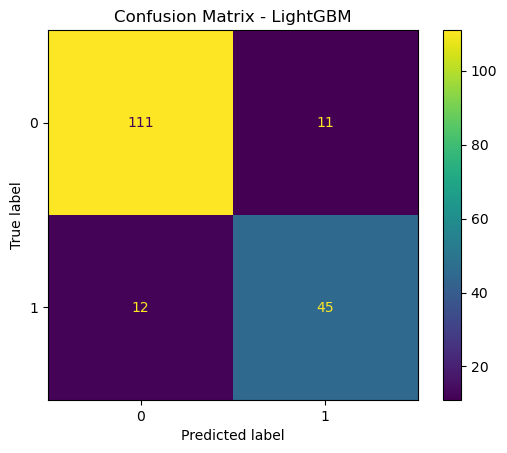

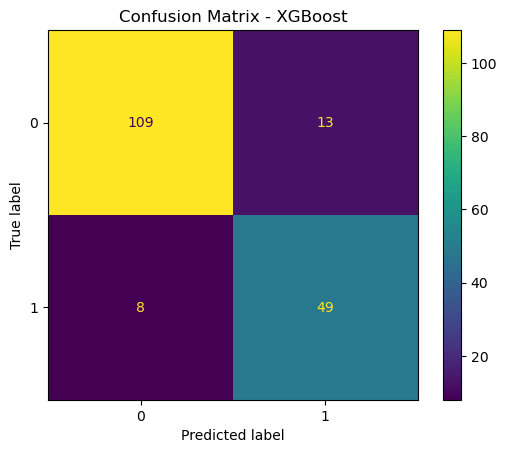

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For LightGBM
cm_lgb = confusion_matrix(y_test, y_pred_lgb_class)
ConfusionMatrixDisplay(cm_lgb).plot()
plt.title("Confusion Matrix - LightGBM")
plt.show()

# For XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb_class)
ConfusionMatrixDisplay(cm_xgb).plot()
plt.title("Confusion Matrix - XGBoost")
plt.show()

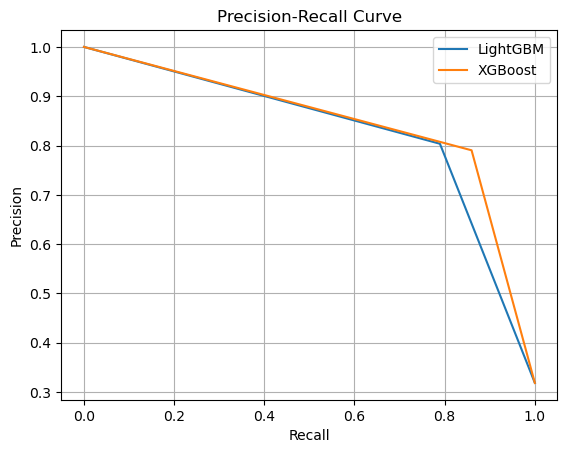

In [100]:
from sklearn.metrics import precision_recall_curve

prec_lgb, rec_lgb, _ = precision_recall_curve(y_test, y_pred_lgb_class)
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_pred_xgb_class)

plt.plot(rec_lgb, prec_lgb, label='LightGBM')
plt.plot(rec_xgb, prec_xgb, label='XGBoost')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()
